# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results
- BONUS: Perform all the plots in 3D instead of 2D

In [135]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

In [136]:
n=64
x=np.linspace(0,1,n) + np.random.rand(4, n)
x=np.vstack([x,np.ones(len(x.T))]).T
y=np.linspace(0,1,n)+ np.random.rand(n) -1

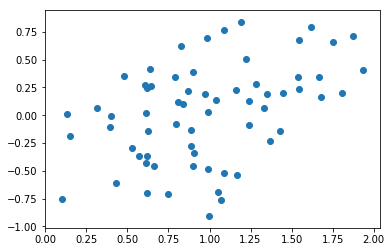

In [137]:
plt.scatter(x.T[0],y)

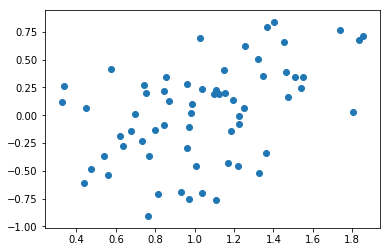

In [141]:
plt.scatter(x.T[1],y)

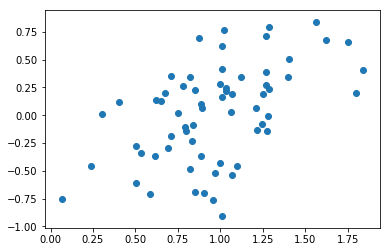

In [142]:
plt.scatter(x.T[2],y)

## 2.  Create a model to fit the data. Hint: follow the example from Lesson 3

In [143]:
n=100
x=np.linspace(0,1,n) + np.random.rand(5, n)
x=np.vstack([x,np.ones(len(x.T))]).T
y=np.linspace(0,1,n)+ np.random.rand(n) -1

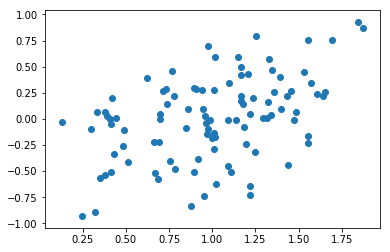

In [144]:
plt.scatter(x.T[0],y)

In [145]:
left=np.linalg.inv(np.dot(x.T, x))

In [146]:
right=np.dot(y.T, x)

In [147]:
np.dot(left, right)

array([ 0.15709266,  0.01034207,  0.24679659,  0.01966989,  0.32320673,
       -0.77011875])

In [148]:
beta=np.linalg.lstsq(x,y) [0]
beta

C:\Users\Erin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([ 0.15709266,  0.01034207,  0.24679659,  0.01966989,  0.32320673,
       -0.77011875])

## 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

In [149]:
pred=np.dot(x, beta)

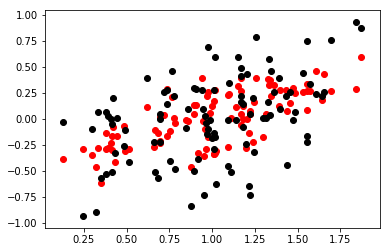

In [150]:
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='black')

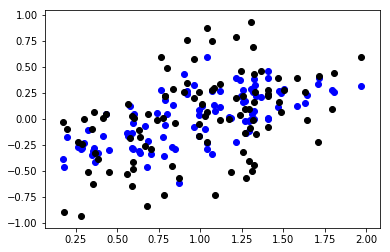

In [151]:
plt.scatter(x.T[1], pred, c='blue')
plt.scatter(x.T[1], y, c='black')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and create a model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [152]:
import pandas as pd
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [157]:
X = credit[['Income', 'Limit']].as_matrix()
X = np.vstack([X.T, np.ones(len(X))]).T
X

C:\Users\Erin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1.48910e+01, 3.60600e+03, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 1.00000e+00]])

In [158]:
y = credit[['Rating']].as_matrix()-1


C:\Users\Erin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [159]:
len(X) == len(y)

True

### 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can. 

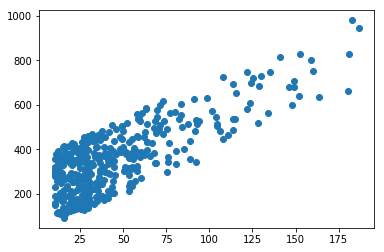

In [161]:
plt.scatter(X.T[0], y)

In [162]:
left = np.linalg.inv(np.dot(X.T, X))

In [163]:
right = np.dot(y.T, X)

In [166]:
np.dot(left, right)

ValueError: shapes (3,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [167]:
beta = np.linalg.lstsq(X, y)[0]
beta

C:\Users\Erin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([[2.07464217e-02],
       [6.65723378e-02],
       [3.77419069e+01]])

In [171]:
pred = np.dot(X, beta)

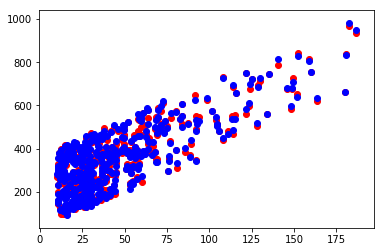

In [169]:
plt.scatter(X.T[0], pred, c='red')
plt.scatter(X.T[0], y, c='b')

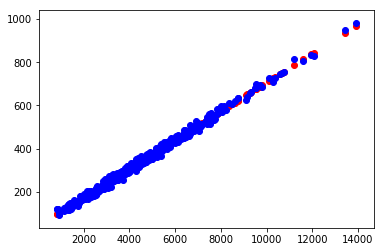

In [170]:
plt.scatter(X.T[1], pred, c='red')
plt.scatter(X.T[1], y, c='b')

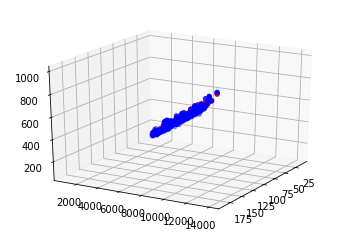

In [172]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(23, 30)
ax.scatter(X.T[0], X.T[1], pred, zdir='z', c='r')
ax.scatter(X.T[0], X.T[1], y, zdir='z', c='b')